<a href="https://colab.research.google.com/github/Jamess-ai/app/blob/master/First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Description: This program uses an artifical recurrent neural network called Long Short Term Memory (LSTM) 
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 days stock price.

In [34]:
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [35]:
!pip install yfinance

In [36]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [37]:
# Get the stock quote
#df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df = pdr.get_data_yahoo("AAPL", start="2012-01-01", end="2019-12-17")
# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.629209,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.697079,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.838044,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.972249,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.951672,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,66.333351,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.899139,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,67.069626,137310400


In [38]:
df.shape

(2002, 6)

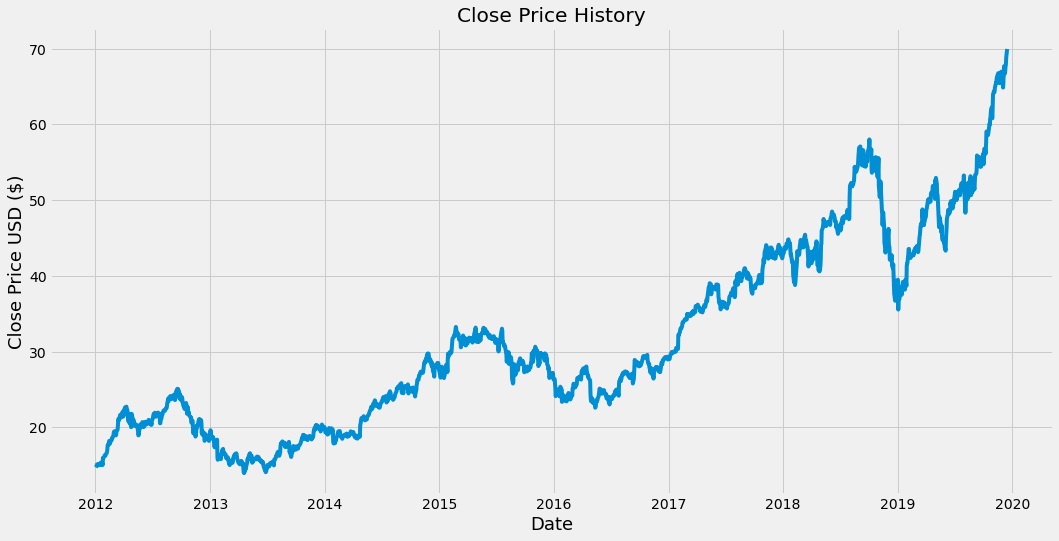

In [39]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [40]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to numpy array
dataset = data.values
# Get the number if rows to train 
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1602

In [41]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [42]:
# Create the training dataset
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Spli the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.0189

In [43]:
# Conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [44]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False)) 
model.add(Dense(25))
model.add(Dense(1))

In [45]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 43s 25ms/step - loss: 0.0019


In [47]:
# Create the testing dataset
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]

# Create the datasets x_text y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [48]:
# Convert the data to a numpy array
x_test = np.array(x_test)


In [49]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [50]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [51]:
# Get the root mean square error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.25402503967285156

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


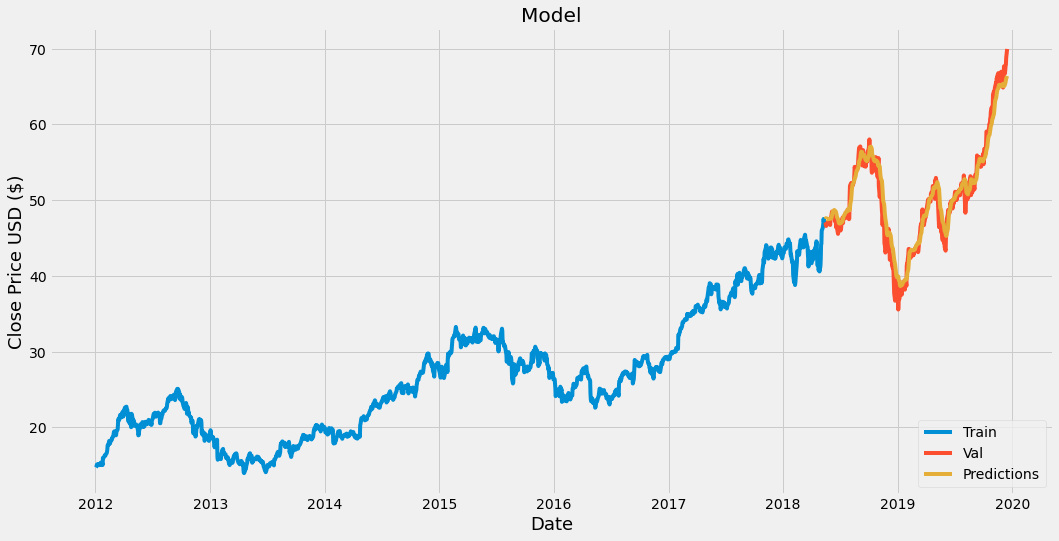

In [52]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualise the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [53]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,47.517185
2018-05-17,46.747501,47.607574
2018-05-18,46.577499,47.613583
2018-05-21,46.907501,47.555599
2018-05-22,46.790001,47.513515
...,...,...
2019-12-10,67.120003,65.398438
2019-12-11,67.692497,65.578896
2019-12-12,67.864998,65.813660


In [62]:
# Get the quote (Doesn't work)
#apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

# Get the quote
apple_quote  = pdr.get_data_yahoo("AAPL", start="2012-01-01", end="2019-12-17")
# Create new data frame
new_df = apple_quote.filter(['Close'])

# Get the last 60 days closing price values and convert the dataframe t oan array
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

# Create an emmpty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test dataset to numpy array 
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# Get predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[66.86486]]
